#I užduotis (Dirbtinis neuronas)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

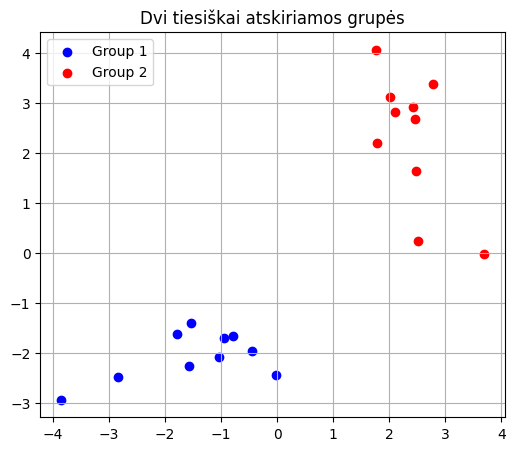

In [12]:
group1 = np.random.randn(10, 2) + np.array([-2, -2])
group2 = np.random.randn(10, 2) + np.array([ 2,  2])

# Sujungiame grupes į vieną duomenų rinkinį
X = np.vstack((group1, group2)) # sujungtos grupes
y = np.array([0]*10 + [1]*10) # 10 nuliu 10 vienetu (klausiu sarasas)

plt.figure(figsize=(6,5))
plt.scatter(group1[:,0], group1[:,1], color='blue', label='Group 1')
plt.scatter(group2[:,0], group2[:,1], color='red',  label='Group 2')
plt.title("Dvi tiesiškai atskiriamos grupės")
plt.legend()
plt.grid(True)

graphX = plt.gca().get_xlim()
graphY = plt.gca().get_ylim()

plt.show()

In [3]:
# Slenksčio (threshold) aktyvavimo funkcija
def threshold_activation(a):
    return (a >= 0).astype(int)

# Sigmoidinė aktyvavimo funkcija
def sigmoid_activation(a):
    return 1 / (1 + np.exp(-a))

# Neurono išvestis
def neuron_output(X, w1, w2, b, activation):
    a = X[:,0]*w1 + X[:,1]*w2 + b
    if activation == "threshold":
        return threshold_activation(a)
    elif activation == "sigmoid":
        return np.round(sigmoid_activation(a))

In [4]:
# Funkcija, kuri ieško 3 skirtingų svorių rinkinių, kurie teisingai klasifikuoja visas reikšmes
def find_solutions(X, y, activation, n):
    solutions = []
    while len(solutions) < n:
        # Generuojame atsitiktines reikšmes
        w1 = np.random.uniform(0, 1)
        w2 = np.random.uniform(0, 1)
        b  = np.random.uniform(0, 1)
        y_pred = neuron_output(X, w1, w2, b, activation)

        # jei klasifikacija sutampa su tikra klasės reikšme
        if np.array_equal(y_pred, y):
            if not any(np.allclose([w1, w2, b], s) for s in solutions): # ir jei tokio (labai panašaus) sprendinio dar neturime
                solutions.append((w1, w2, b)) # pridedame sprendinį į sprendinių sarašą

    return solutions

# Trys sprendimai su slenksčio (threshold) aktyvacija
threshold_solutions = find_solutions(X, y, "threshold", 3)
print("Threshold sprendimai (w1, w2, b):")
for s in threshold_solutions:
    print(s)

# Trys sprendimai su sigmoidine aktyvacija
sigmoid_solutions = find_solutions(X, y, "sigmoid", 3)
print("\nSigmoid sprendimai (w1, w2, b):")
for s in sigmoid_solutions:
    print(s)

Threshold sprendimai (w1, w2, b):
(0.8743404114504271, 0.10973297139955329, 0.2795722687188439)
(0.32068889830624725, 0.3850706920030631, 0.19564651448974724)
(0.6174814558591828, 0.49673250873662533, 0.5106338656520907)

Sigmoid sprendimai (w1, w2, b):
(0.894371978542239, 0.056440749072929286, 0.8416196686215623)
(0.22940258954992032, 0.8021659949713812, 0.41468942885065085)
(0.4409423035234521, 0.5152298855816486, 0.7752107534840613)


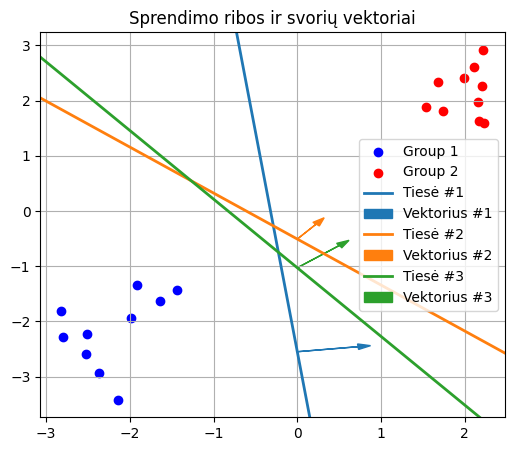

In [5]:
def plot_decision_lines(X, y, solutions):
    plt.figure(figsize=(6,5))

    plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Group 1')
    plt.scatter(X[y==1,0], X[y==1,1], color='red',  label='Group 2')
    plt.title("Sprendimo ribos ir svorių vektoriai")
    plt.grid(True)
    plt.xlim(graphX)
    plt.ylim(graphY)

    # Nustatome x ašies intervalą
    x_vals = np.linspace(graphX[0], graphX[1], 2)

    for i, (w1, w2, b) in enumerate(solutions, start=1):
        if abs(w2) < 1e-6:  # vengiam beveik vertikalios tiesės / dalybos iš nulio
            continue

        # Skiriamoji tiesė: w1*x + w2*y + b = 0  →  y = -(w1*x + b)/w2 / gaunamas statmenas vektorius
        y_vals = -(w1*x_vals + b) / w2

        (line_handle,) = plt.plot(x_vals, y_vals, linewidth=2, label=f"Tiesė #{i}")
        line_color = line_handle.get_color()

        # Vektorius nuo taško ant tiesės
        if (graphX[0] <= 0.0 <= graphX[1]): x0 = 0.0
        else: x0 = 0.5*(graphX[0] + graphX[1])

        y0 = -(w1*x0 + b) / w2
        plt.arrow(x0, y0, w1, w2, head_width=0.1, linestyle="-", color=line_color, length_includes_head=True, label=f"Vektorius #{i}")


    # Legenda
    handles, labels = plt.gca().get_legend_handles_labels()
    uniq = dict(zip(labels, handles))
    plt.legend(uniq.values(), uniq.keys(), loc="best")

plt.show()

plot_decision_lines(X, y, threshold_solutions)

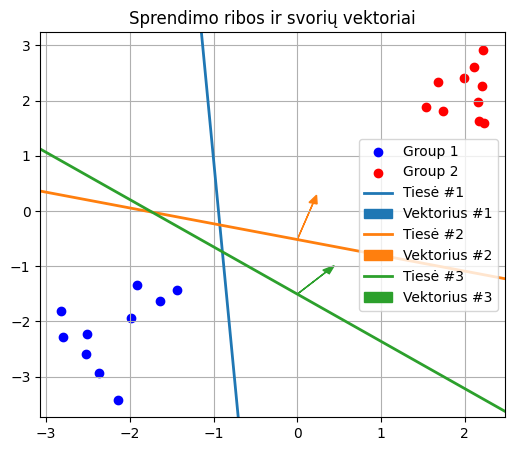

In [6]:
plot_decision_lines(X, y, sigmoid_solutions)

In [7]:
"""
Threshold sprendimai (w1, w2, b):
(0.7489331089031482, 0.6573421498563868, 0.03029550337682141)
(0.7131702039752154, 0.9455292520543869, 0.008406950403083258)
(0.3973972009451917, 0.8004181500544941, 0.23441995940763682)

Sigmoid sprendimai (w1, w2, b):
(0.10696534073099229, 0.595238642416752, 0.7660916217704453)
(0.5204067345900218, 0.6497675479556682, 0.7891144759137252)
(0.4648977334257818, 0.8515866527758138, 0.7895645152464356)
"""

'\nThreshold sprendimai (w1, w2, b):\n(0.7489331089031482, 0.6573421498563868, 0.03029550337682141)\n(0.7131702039752154, 0.9455292520543869, 0.008406950403083258)\n(0.3973972009451917, 0.8004181500544941, 0.23441995940763682)\n\nSigmoid sprendimai (w1, w2, b):\n(0.10696534073099229, 0.595238642416752, 0.7660916217704453)\n(0.5204067345900218, 0.6497675479556682, 0.7891144759137252)\n(0.4648977334257818, 0.8515866527758138, 0.7895645152464356)\n'